In [22]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
# Load dataset
df = pd.read_csv("final_version.csv", low_memory=False)
df.shape

(56858, 10)

In [23]:
# df['prix'] = np.log(df['prix'] + 1)

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define features
categorical_features = ["Transmission", "Carburant", "marque", "modele", "premierMain"]
numerical_features = ["Kilométrage", "Année", "CV"]

# Make a copy of the original DataFrame (optional, for safety)
df_encoded = df.copy()

# Ensure categorical columns are strings
df_encoded[categorical_features] = df_encoded[categorical_features].astype(str)

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Optional: Save encoder for inverse_transform or inference

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Final feature matrix and target
X = df_encoded[categorical_features + numerical_features]
y = df_encoded["prix"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape
X_test.shape

(11372, 8)

[0]	validation_0-rmse:87648.58132	validation_1-rmse:87593.22050
[100]	validation_0-rmse:30445.02012	validation_1-rmse:31718.16741
[200]	validation_0-rmse:27236.28477	validation_1-rmse:29060.55127
[300]	validation_0-rmse:25625.14603	validation_1-rmse:28159.34473
[400]	validation_0-rmse:24559.21997	validation_1-rmse:27674.06243
[500]	validation_0-rmse:23735.83837	validation_1-rmse:27397.42358
[600]	validation_0-rmse:23011.48087	validation_1-rmse:27185.63981
[700]	validation_0-rmse:22459.15574	validation_1-rmse:27063.38802
[800]	validation_0-rmse:21891.13145	validation_1-rmse:26944.16254
[900]	validation_0-rmse:21416.61341	validation_1-rmse:26842.76735
[1000]	validation_0-rmse:20958.10580	validation_1-rmse:26806.31638
[1100]	validation_0-rmse:20578.95501	validation_1-rmse:26776.26007
[1200]	validation_0-rmse:20211.72814	validation_1-rmse:26759.15415
[1300]	validation_0-rmse:19855.45116	validation_1-rmse:26737.88801
[1400]	validation_0-rmse:19528.02340	validation_1-rmse:26739.76345
[1500]	

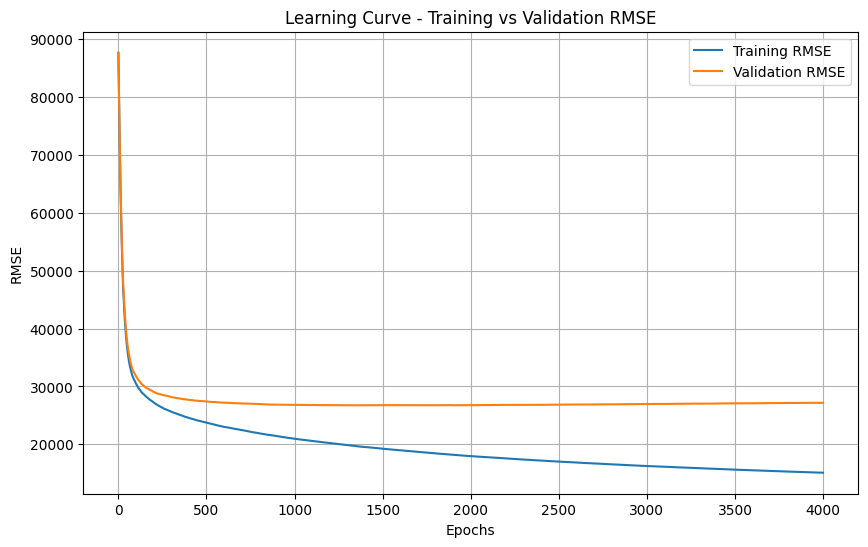

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

    # Définir les caractéristiques et la variable cible

    # Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Meilleurs hyperparamètres trouvés
best_params = {
    'n_estimators': 4000,
    'learning_rate': 0.04,
    'max_depth': 7,
    'subsample': 0.9,
    'min_child_weight': 2,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1
}

    # Modèle XGBoost avec les meilleurs paramètres
model = xgb.XGBRegressor(**best_params, random_state=42)

    # Entraînement du modèle sans early stopping
    # Entraînement du modèle sans early stopping
model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)  # No need for eval_metric


    # Prédictions sur les données de test
y_pred = model.predict(X_test)
print("the prediction ", y_pred)

    # Évaluation
r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

    # Affichage des performances
print("🔍 Évaluation du modèle XGBoost")
print(f"✅ Accuracy (R² Score)        : {r2:.2f}")
print(f"📉 Mean Absolute Error (MAE) : {mae:.2f}")
print(f"📉 Mean Squared Error (MSE)  : {mse:.2f}")
print(f"📉 Root Mean Squared Error   : {rmse:.2f}")

# Sauvegarde du modèle

    # Plotting the learning curve
epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Training RMSE')
plt.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Learning Curve - Training vs Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

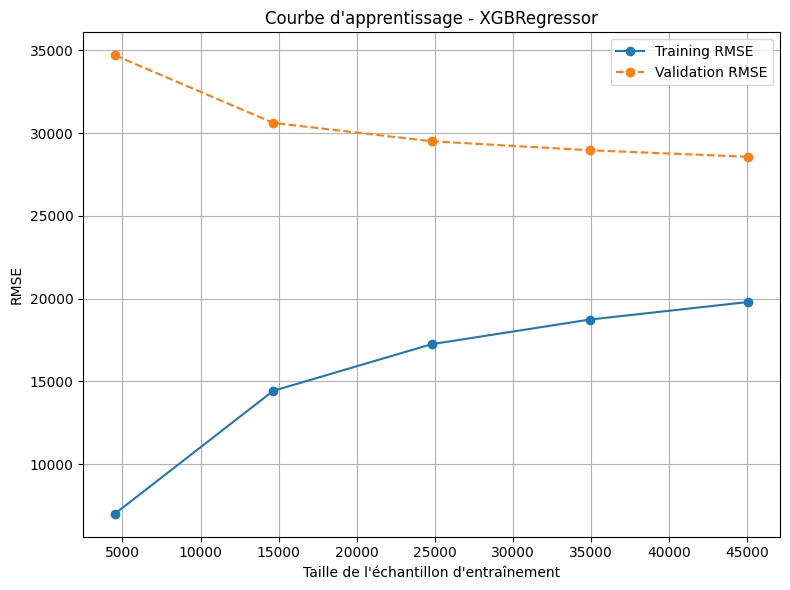

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit
from xgboost import XGBRegressor

# ✅ Charger le modèle entraîné (déjà entraîné et sauvegardé avec joblib)
xgb_model = joblib.load('xgboost_model.pkl')

# ✅ Définir les données (à adapter selon votre cas)
# Exemple : X_train, y_train = votre_fonction_de_chargement()
# Assurez-vous que X_train et y_train sont bien définis
# X_train = ...
# y_train = ...

# ✅ Vérification si les données existent
try:
    X_train
    y_train
except NameError:
    raise ValueError("Vous devez définir X_train et y_train avant d'exécuter ce script.")

# ✅ Définir la validation croisée
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# ✅ Fonction de traçage de la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    val_rmse = np.sqrt(-val_scores.mean(axis=1))

    plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
    plt.plot(train_sizes, val_rmse, 'o--', label='Validation RMSE')
    plt.title(title)
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)

# ✅ Tracer la courbe
plt.figure(figsize=(8, 6))
plot_learning_curve(xgb_model, "Courbe d'apprentissage - XGBRegressor", X_train, y_train, cv)
plt.tight_layout()
plt.show()


In [ ]:
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
def predict_price(input_data, model, scaler, label_encoders, numerical_features, categorical_features):
    import numpy as np
    import pandas as pd

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Encode categorical features using saved LabelEncoders
    for col in categorical_features:
        le = label_encoders[col]
        input_df[col] = le.transform(input_df[col].astype(str))

    # Scale numerical features
    input_df[numerical_features] = scaler.transform(input_df[numerical_features])

    # Ensure column order matches training data
    X_input = input_df[categorical_features + numerical_features]

    # Predict
    predicted_price = model.predict(X_input)[0]
    return predicted_price # Return both log and original price


In [ ]:
input_data = {
    "Transmission": "Automatique",
    "Carburant": "Diesel",
    "marque": "BMW",
    "modele": "X5",
    "premierMain": "1",
    "Kilométrage": 150000,
    "Année": 2022,
    "CV": 15
}

predicted_price = predict_price(input_data, model, scaler, label_encoders, numerical_features, categorical_features)
print(f"Predicted price: {predicted_price:.2f} MAD")


Predicted price: 367055.25 MAD
